In [1]:
include("../encoding.jl")
include("../plotting.jl")

visualize_pxy (generic function with 2 methods)

# Two Dimensions

In [2]:
using Base.Iterators
using LinearAlgebra

In [3]:
bipolar=true
D, l = 20_000, 0.1
x = range(0,1, length=100)
xy_grid = collect(product(x,x));
xy = collect(reduce(hcat, collect.(vec(xy_grid)))');

In [4]:
function p(args::Vector)
    m1 = [0.35,0.35]
    m2 = [0.65,0.65]
    s = 0.15/2
    n = sqrt((2π)^2*0.15^4)
    return exp(-LinearAlgebra.norm(((args .-m1) /(2*s)))^2)/n + exp(-LinearAlgebra.norm(((args .-m2) /(2*s)))^2)/n
end
pxy = reshape(p.(xy[i,:] for i in 1:size(xy, 1)), size(xy_grid));

In [5]:
mean(pxy)

0.979304439241492

In [6]:
encoder = realvalue_encoder(l,D, bipolar=bipolar);
Δxy = encode(encoder, xy[:,1]) .* circshift(encode(encoder, xy[:,2]), (0,1))
P = Δxy' * pxy[:] / size(xy,1);

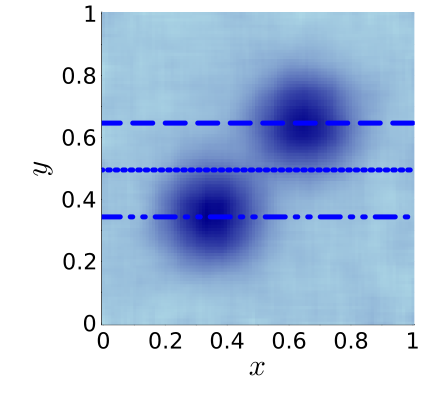

In [7]:
pl = heatmapplot(reshape(Δxy * P / D, size(pxy)), cgrad(:blues, rev=false), colorbar=false, xlabel=L"x",ylabel=L"y",clim=nothing)
conditions=[0.35, 0.50, 0.65]
colors = [:red, :cyan, :green]
linestyles = [:dashdotdot, :dot, :dash]
for i in 1:length(conditions)
    plot!([0,100],[100*conditions[i],100*conditions[i]], label="", linewidth=5, c=:blue, linestyle=linestyles[i],xlim=(0.5,100+0.5),ylim=(0.5,100+0.5))
end
#save(pl, "joint")
pl

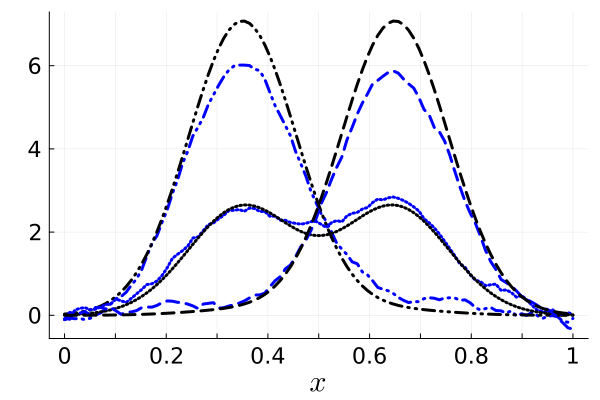

In [8]:
xvalues = range(0,1,length=11);
xmarks = [0, "", 0.2, "", 0.4, "", 0.6, "", 0.8, "", 1]
yvalues = [0];

pl = plot(xticks=(xvalues, xmarks), xlabel=L"x",legend=false)
for i in 1:3
    Pc = P .* circshift(encode(encoder,conditions[i]), (0,1))[:]
    plot!(x, encode(encoder,x)*Pc /D, c=:blue, linewidth=3, linestyle=linestyles[i])
    plot!(x, [p([conditions[i],xi]) for xi in x], c=:black, linewidth=3, linestyle=linestyles[i])
end
plot!(guidefontsize=20, tickfontsize=15,left_margin = 5Plots.mm)
#save(pl, "conditioned")
pl

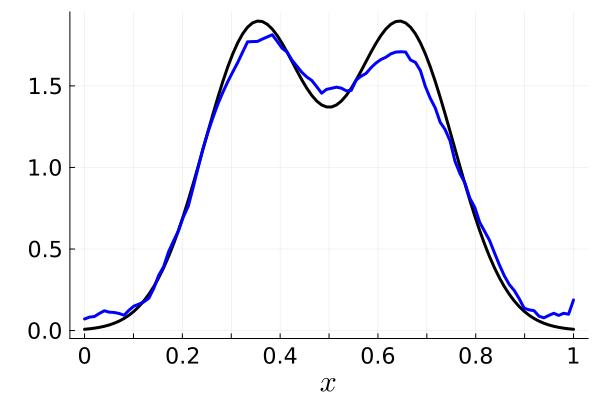

In [9]:
#transform of function one on x-axis
Ox = (sum(encode(encoder,x), dims=1)/length(x))[:];

pl = plot(xticks=(xvalues, xmarks), xlabel=L"x",legend=false)
Pm = P .* Ox
plot!(x, mean(pxy,dims=1)[:], c=:black, linewidth=3)
plot!(x, circshift(encode(encoder,x), (0,1))*Pm / D, c=:blue, linewidth=3)
plot!(guidefontsize=20, tickfontsize=15,left_margin = 5Plots.mm)
#save(pl, "marginal")
pl

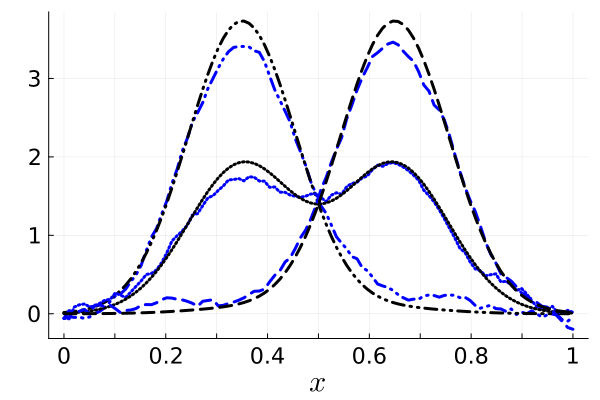

In [13]:
pl = plot(xticks=(xvalues, xmarks), xlabel=L"x",legend=false)
for i in 1:3
    nc = circshift(encode(encoder,conditions[i]), (0,1)) * Pm /D
    Pc = P .* circshift(encode(encoder,conditions[i]), (0,1))[:] /D
    
    plot!(x, encode(encoder,x)*Pc / nc, c=:blue, linewidth=3, linestyle=linestyles[i])
    ptrue = [p([conditions[i],xi]) for xi in x]
    plot!(x, ptrue/mean(ptrue), c=:black, linewidth=3, linestyle=linestyles[i])
end
plot!(guidefontsize=20, tickfontsize=15,left_margin = 5Plots.mm)
#save(pl, "bayes")
pl